#  Atividade 02 de Probabilidade

## Lista de exercícios

## Aluno: Gustavo Pereira Marcena

In [3]:
import math 
import pandas as pd

## Exercício 01

In [2]:
l_trimodal = [8, 5, 9, 6, 5, 4, 3, 5, 2, 1, 1, 6, 6, 4, 0, 7, 8, 9, 8]
l_amodal = [9,5,2,7,12,8,4,0,3]

# Código do trimodal 

freq = [ (numero, l_trimodal.count(numero)) for numero in set(l_trimodal) ]

freq.sort(key = lambda par: par[1])
biggestNum = 0;
for i in freq:
    if i[1] > biggestNum:
        biggestNum = i[1]

moda = []
for i in freq:
    if i[1] == biggestNum:
        moda.append(i[0])

print("A moda trimodal é ",moda)
print("-"*40)
# Código da amodal
repetidos = 0

for i in range(0, len(l_amodal)-1):
    for g in range(0, len(l_amodal)-1):
        if i != g and l_amodal[i] == l_amodal[g]:
            repetidos += 1

if repetidos == 0:
    print("Este conjunto de dados é amodal")

A moda trimodal é  [5, 6, 8]
----------------------------------------
Este conjunto de dados é amodal


## Exercício 02

In [3]:
import pandas as pd

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
classes = pd.cut(df.bmi, bins = 10)
freq = classes.value_counts()
moda = freq.idxmax()
print("A moda do IMC é ", moda)

inferior = moda.left
superior = moda.right

ponto_medio = (superior + inferior) /2
print("O ponto medio é ", ponto_medio)


A moda do IMC é  (19.03, 27.76]
O ponto medio é  23.395000000000003


## Exercício 03

### Moda de Czuber

In [29]:
classes = pd.cut(df.bmi, bins = 10)
freq = classes.value_counts()

# Criando as variáveis

# Limite inferior
lim_Inferior = moda.left
# Amplitude = maior valor da moda - menor
amplitude = moda.right - moda.left
# Deixando a frequência em ordem
freq = freq.sort_index()
# Encontrando a moda
moda = freq.index[freq == freq.max()].tolist()[0]
# Pegando a classe anterior
classe_anterior = freq.index[freq.index < moda].tolist()[-1]
# Pegando a classe posterior
classe_posterior = freq.index[freq.index > moda].tolist()[0]
# Pegando o valor das frequências

freq_Classe_anterior = freq[classe_anterior]
freq_Classe_posterior = freq[classe_posterior]
freqModa = freq[moda]

delta1 = freqModa - freq_Classe_anterior
delta2 = freqModa - freq_Classe_posterior

modaCzuber = lim_Inferior + (amplitude * (delta1/(delta1 + delta2)))
print("A moda de Czuber é ",modaCzuber)



A moda de Czuber é  26.96775761124122


### Moda de king

In [5]:
classes = pd.cut(df.bmi, bins = 10)
freq = classes.value_counts()

# Criando as variáveis

# Limite inferior
lim_Inferior = moda.left
# Amplitude = maior valor da moda - menor
amplitude = moda.right - moda.left
# Deixando a frequência em ordem
freq = freq.sort_index()
# Encontrando a moda
moda = freq.index[freq == freq.max()].tolist()[0]
# Pegando a classe anterior
classe_anterior = freq.index[freq.index < moda].tolist()[-1]
# Pegando a classe posterior
classe_posterior = freq.index[freq.index > moda].tolist()[0]
# Pegando o valor das frequências
classe_anterior = freq[classe_anterior]
classe_posterior = freq[classe_posterior]

modaKing = lim_Inferior + (amplitude * (classe_posterior/(classe_posterior + classe_anterior)))
print("A moda de king é ",modaKing)


A moda de king é  26.143770270270274


## Exercício 4

In [28]:
# Calculando a moda de Pearson, que é 3*mediana - 2*media
classes = pd.cut(df.bmi, bins = 10)
freq = classes.value_counts()


freq = freq.sort_index()

# Descobrindo a mediana e media 

mediana = df["bmi"].median()
media = df["bmi"].mean()

# Calculando a moda de Pearson

modaPearson = (3*mediana) - (2*media)
print("A moda de Pearson é ", modaPearson)


A moda de Pearson é  26.51352617641068


## Exercício 5

(array([  2.,  11.,  51., 120., 231., 265., 184., 103.,  29.,   4.]),
 array([-3.473133  , -2.8164441 , -2.1597552 , -1.5030663 , -0.84637741,
        -0.18968851,  0.46700039,  1.12368929,  1.78037819,  2.43706709,
         3.09375599]),
 <BarContainer object of 10 artists>)

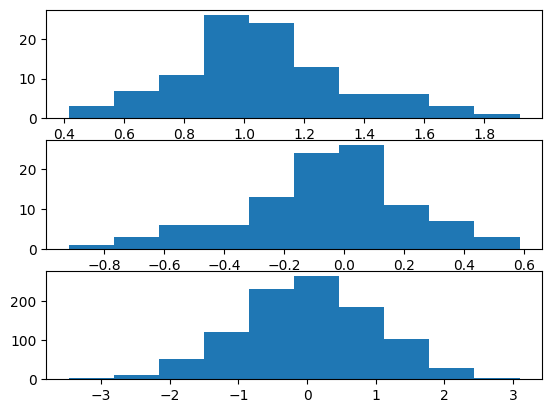

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,1)

X = pd.Series(np.random.lognormal(0,.3,100))
Xp = pd.Series(1-X)
Xn = pd.Series(np.random.normal(0,1,1000))

axs[0].hist(X, bins = 10, )
axs[1].hist(Xp, bins = 10 ,)
axs[2].hist(Xn, bins = 10 ,)

## Assimetria de pearson 


In [21]:
# media - moda / desvio padrão 
import numpy as np


desvio_padrao = freq.std()
assimetriaPearson = 3*(df['bmi'].mean() - df['bmi'].median())/df['bmi'].std()
print("A assimetria de Pearson é ",assimetriaPearson)


A assimetria de Pearson é  0.3029908985100897


## Assimetria de Bowley

In [18]:
# Calcular os quartis
q1 = df['bmi'].quantile(0.25)
q2 = df['bmi'].quantile(0.5)
q3 = df['bmi'].quantile(0.75)
# Calcular a assimetria de Bowley
assimetriaBowley = (q3 - (2 * q2) + q1) / (q3 - q1)

print("A assimetria de Bowley é", assimetriaBowley)


A assimetria de Bowley é 0.04166666666666651
